- compiler verifies type-safety of code before earasing generics
- type _erasure_
- compiler adds type cast info
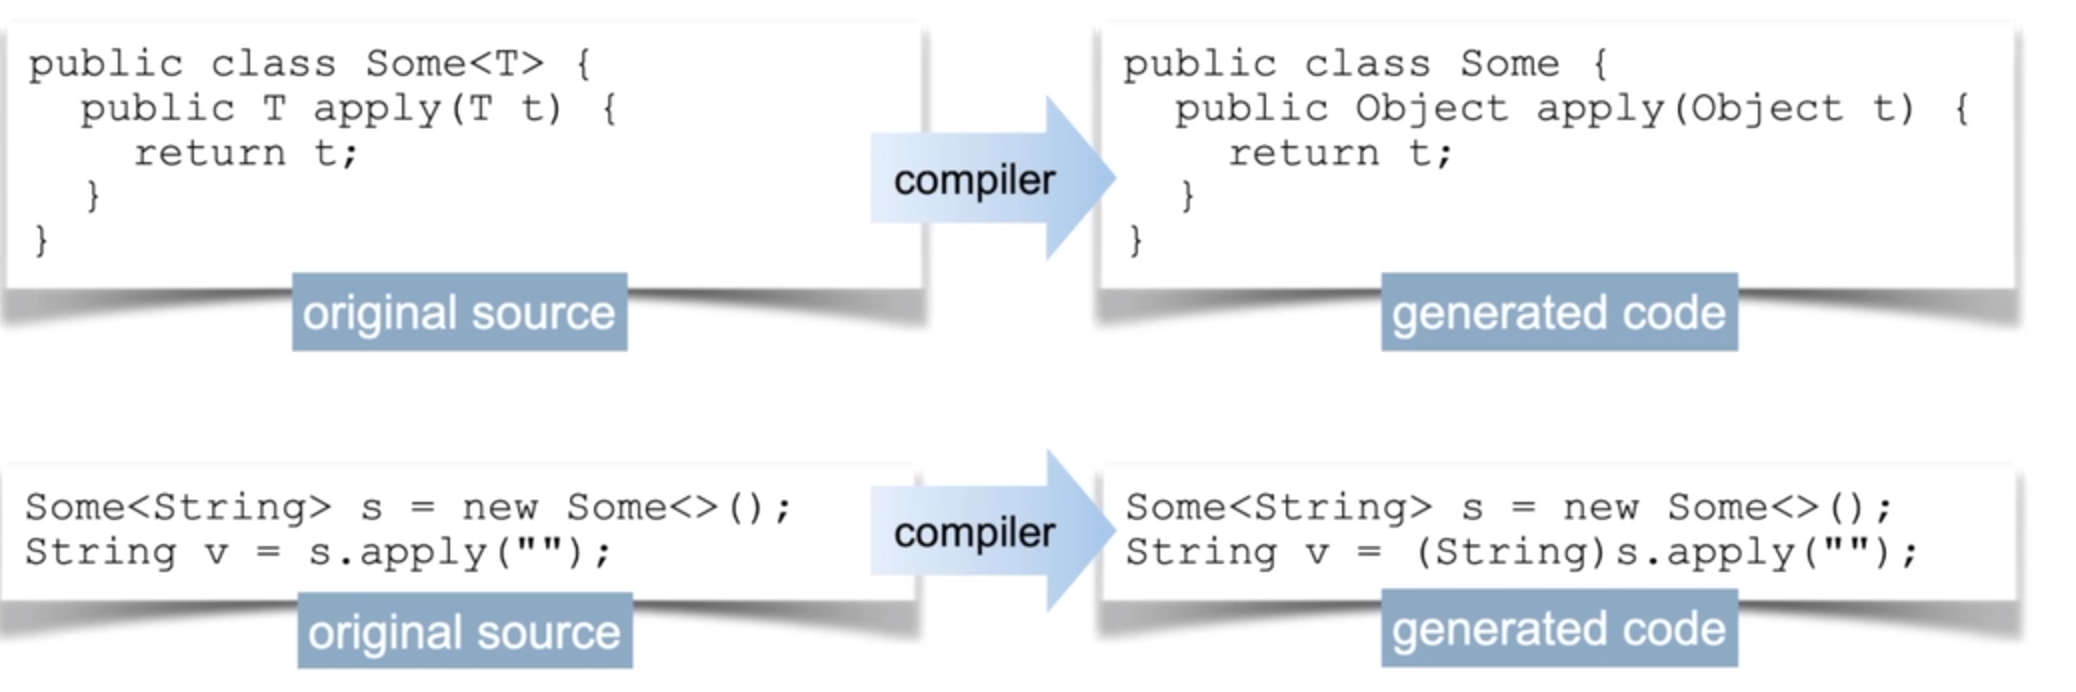

## Generic And Raw Type Compatibility
- compiler verifies type-safety of your code before erasing generics
- ! adds an additional compiler generated bridge method 
- bridge methods compiles with non-generic signature
- bridge method then calls the generic method and applies type casting
- user of code does not need to apply type casting

Note: bridge methods ensure compatibility with non-generic code (use straight `Object`)
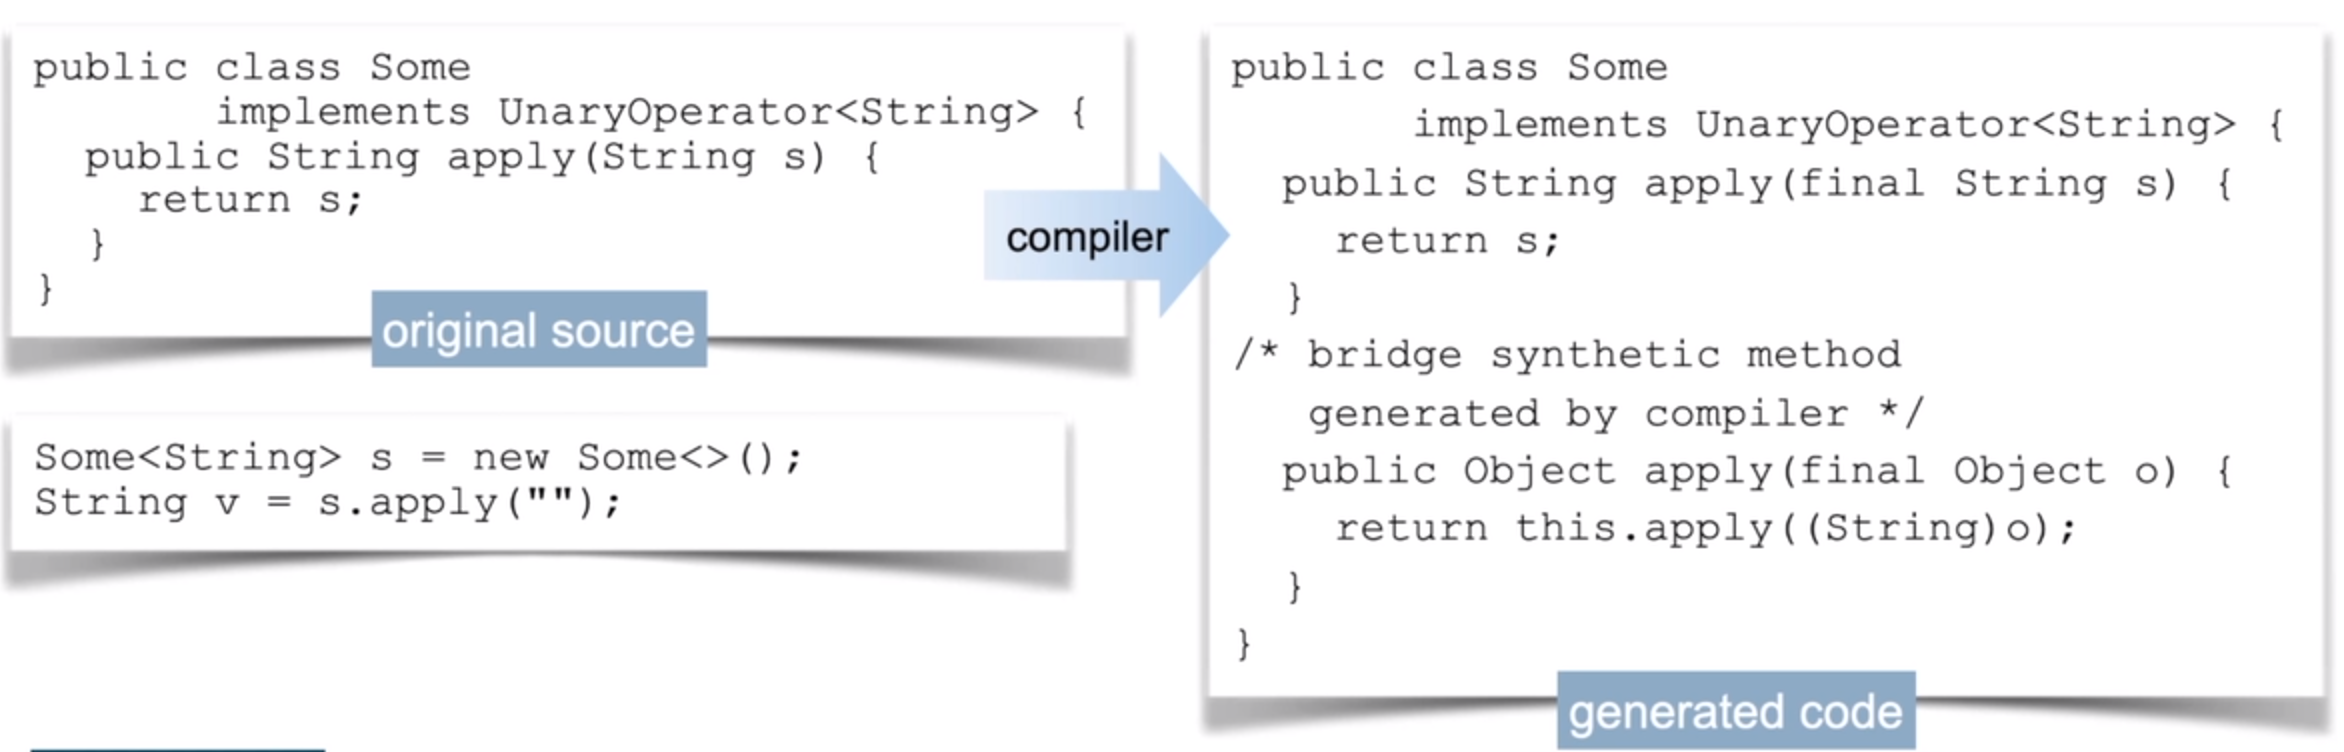

## Generics And The Type Hierarchy

In [52]:
class Product {}
class Food extends Product {}
class Drink extends Product {}

### Arrays are covariant

- covariant
    - arrays are covariant > can result into _runtime_ exceptions
    - _array_ of subtype is assignable to a variable declared as an array of the supertype

In [6]:
Product[] products = new Food[10];
// it's a runtime check, the code compiles when this branch is activated
// if (false)    
 products[0] = new Drink();

EvalException: REPL.$JShell$14$Drink

### Collection API with invariant generics
- collection API uses generics that are _invariant_
- code is validated at compile time
- can't assign a list of subtype to list of supertype  -> compiler error        

In [10]:
// compiler error
List<Product> products = new ArrayList<Food>();

CompilationException: 

no compiler checks on raw types -> can lead to runtime exceptions

In [15]:
List<Food> foods = new ArrayList<Food>();
List values = foods;
List<Product> products = values;    // compiler warns about unsafe operation
products.add(new Drink());          // no warning
Drink x1 = (Drink) values.get(0);   // explicit cast works

In [17]:
// runtime cast exception
Food x2 = foods.get(0);

EvalException: class REPL.$JShell$14$Drink cannot be cast to class REPL.$JShell$13$Food (REPL.$JShell$14$Drink and REPL.$JShell$13$Food are in unnamed module of loader jdk.jshell.execution.DefaultLoaderDelegate$RemoteClassLoader @41fbdac4)

## Wildcard Generics
- generics enforce _compile-time_ verification of a type
- hint: **wildcard** has to be **on the left side** of an assignment

|Type of bound   |Syntax                   |           Example  |
|-----------------|------------------------|--------------------|
|Unbounded wildcard|  `?`  |   `List<?> a = new ArrayList<String>();`|
|Wildcard with an upper bound| `? extends type` | `List<? extends Exception> a = new ArrayList<RuntimeException>();` |
|Wildcard with a lower bound | `? super type` |`List<? super Exception> a = new ArrayList<Object>();` |

### No Generics Example
- only Object class operations can be applied safetly
- type-check/ casting must be applied to access sub-type specific operations

In [20]:
// add, remove and manipulate instances of _Object_ or its decendants
List listOfAnyObject1 = new ArrayList();

// same as above, since everything inherits from the Object parent class
List<Object> listOfAnyObject2 = new ArrayList<>(); 

### Specific Type Example
- any operations declared for this type _or its parents_ can be safely used
- type-check and type-casting must be applied to access any sub-type specific operations

In [21]:
List<Product> products = new ArrayList<>();

### Wildcard Example
- represents unknown type
- elements are accessed just like in a collection of Objects
- goes into _read-only_ mode
- no object in Java of unknown type > no values except `null` can be added to such collection
- this is a _covariant_ assignment
    - assigning a specific type to a less specific type (like the array example)

In [23]:
List<?> listOfUnknownType = products;

In [26]:
// null can be added
listOfUnknownType.add(null);

true

In [27]:
// anything else is prohibited -> read-only mode
listOfUnknownType.add(new Drink());

CompilationException: 

### Wildcard Trickery

In [21]:
// "l" is seen as a list of "Object"
List<?> l = List.of("A", "B");

// type mismatch. Object vs String
l.removeIf(String::isEmpty);

CompilationException: 

## Upper Bound Wildcard - Covariant
- "turns code in covariant code"
- `<? extends ParentType>` - allows use of subtype collections
- is read-only
- is _covariant_ - you can assign a `List<Drink>` and `List<Food>` to such list
<img src=attachment:image.png width=300></img>
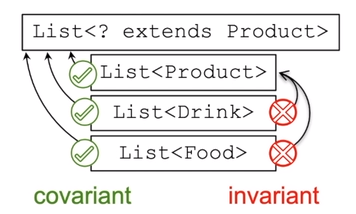

In [34]:
Product p1 = new Food();
Product p2 = new Drink();
Product p3 = new Food();

In [43]:
// invariant list
List<Product> invariantList = new ArrayList<>();
products = new ArrayList<Drink>();

CompilationException: 

In [44]:
// covariant list
List<? extends Product> covariantList = new ArrayList<>();
covariantList = new ArrayList<Drink>();

In [46]:
// read-only
covariantList.add(new Drink());

CompilationException: 

## Lower Bound Wildcard
- `<? super Type>` allows to use this type and its _parents_
- is writeable - parent instances can be added
- is _contra_variant_ - you can assign a `List<Food>` or `List<Product>` or `List<Object>` to such list


<img src=attachment:image.png width=300></img>
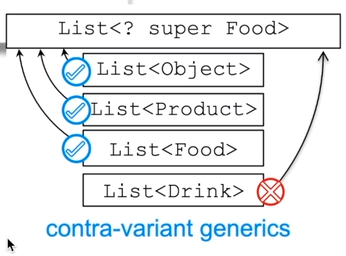

In [70]:
List<Product> productList = new ArrayList<>();
productList.add(new Product());

// covariant list
List<? super Food> contraVariantList = new ArrayList<>();
contraVariantList = productList;
contraVariantList.add(new Food());

contraVariantList.forEach(it -> System.out.println(it.getClass()))

class REPL.$JShell$12$Product
class REPL.$JShell$13$Food


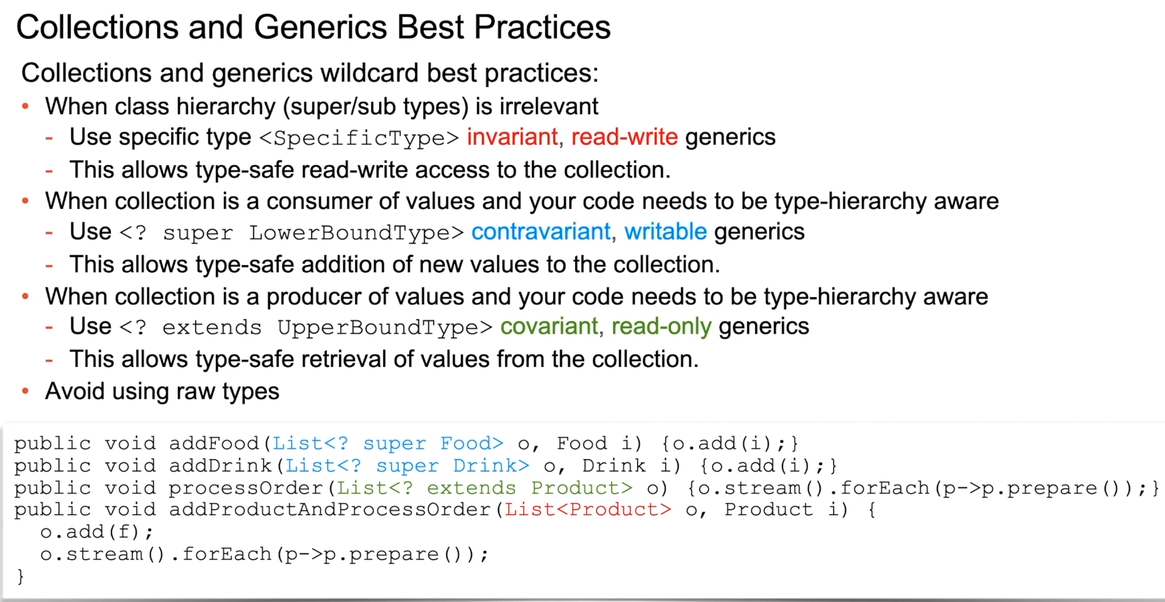

- documentation note
    - contravariant (writable) is described as _Consumer_
        - the collection is consuming values
    - covariant (read-only) is described as _Producer_
        - the collection is producing values
    - written from the Collection's perspective , NOT from the application side

## PECS
- Producer `extends`
- Consumer `super`

# Playground

In [5]:
class A {}
class B extends A {}
class C extends B {}
class Z {}

In [11]:
// compiles
// any generic type is ok
List<?> l1 = new ArrayList<A>();

In [15]:
// left side allows for "B" and "C" but not for "A" as required from the right side
List<? extends B> l1 = new ArrayList<A>();

CompilationException: 

In [18]:
// normal use of generics
// handle list of T or it's subclasses
// return that T
<T> T returnFirstItem(List<? extends T> list) {
    return list.get(0);
}